In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [2]:
def calcularBSS(df,features):
    centroid_global = df[features].mean()
    bss = 0
    for cluster_label in df['cluster'].unique():
        cluster_points = df[df['cluster'] == cluster_label]
        centroid_cluster = cluster_points[features].mean()
        distance_squared = np.sum((centroid_cluster - centroid_global)**2)
        bss += distance_squared

    return bss



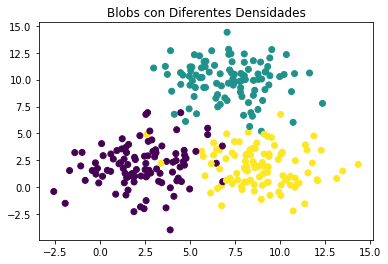

In [3]:
# Crear blobs con diferentes densidades
X1, y1 = make_blobs(n_samples=300, centers=([2, 2], [7, 10], [9, 2]), cluster_std=[2, 2, 2], random_state=10)
# Visualizar los blobs
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title("Blobs con Diferentes Densidades")
plt.show()

In [4]:
df = pd.DataFrame(X1, columns = ['X','y'])

wss= 1950.4108320944413
bss= 67.80314505937564
total= 2018.2139771538168


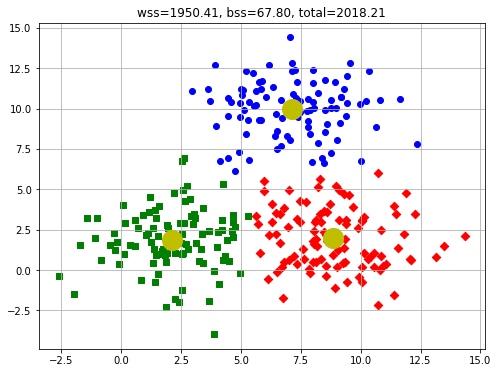

8


In [5]:
n_clusters = 3
#k_means = KMeans(n_clusters=n_clusters,  n_init=1, max_iter=1, init='random')
k_means = KMeans(n_clusters=n_clusters, init='random')
k_means.fit(df)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
df["cluster"] = etiquetas
wss = k_means.inertia_
bss = calcularBSS(df, ['X', 'y'])
total = wss+bss
print("wss=",wss)
print("bss=",bss)
print("total=",wss+bss)

df["cluster"].unique()
n_clu = df["cluster"].unique()
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
for i in n_clu:
    x = df[df["cluster"]==i]["X"]
    y = df[df["cluster"]==i]["y"]
    plt.scatter(x, y, marker=markers[i%len(markers)], color=colors[i%len(colors)])

plt.plot(centroides[:,0],centroides[:,1],'yo', markersize=20, label='centroides')
plt.title(f"wss={wss:.2f}, bss={bss:.2f}, total={total:.2f}")
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()
print(k_means.n_iter_)


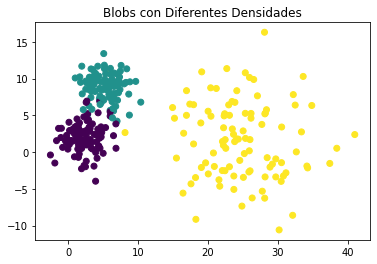

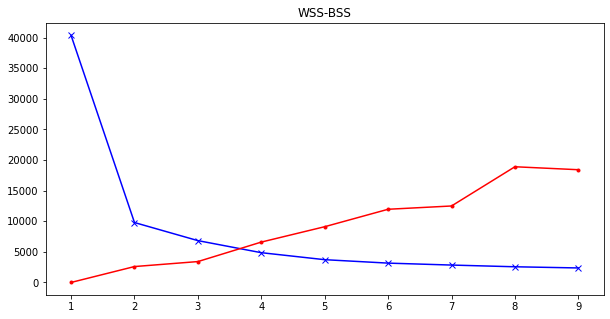

In [7]:
# Crear blobs con diferentes densidades
X1, y1 = make_blobs(n_samples=300, centers=([2, 2], [5, 9], [25, 2]), cluster_std=[2, 2, 6], random_state=10)
# Visualizar los blobs
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title("Blobs con Diferentes Densidades")
plt.show()
df = pd.DataFrame(X1, columns = ['X','y'])

nClusters = range(1,10,1)
bss_list = []
wss_list = []
for n_cluster in nClusters:
    k_means = KMeans(n_clusters=n_cluster, init='random')
    k_means.fit(df)
    centroides = k_means.cluster_centers_
    etiquetas = k_means.labels_
    df["cluster"] = etiquetas
    bss_list.append(calcularBSS(df, ['X', 'y']))
    wss_list.append(k_means.inertia_)
    total = bss_list[-1]+wss_list[-1]
    #print("total=",k_means.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(nClusters, [e for e in wss_list],'bx-')
plt.plot(nClusters, [e*10 for e in bss_list],'r.-')
plt.title('WSS-BSS')
plt.show()